In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-and-health-metrics/wearable_tech_sleep_quality_extended.csv


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("/kaggle/input/sleep-and-health-metrics/wearable_tech_sleep_quality_extended.csv")
df

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,76.22,36.46,1.31,8.04,5.72,157.45,6.83,0.04,11.52
1,116.55,37.35,1.23,8.78,8.05,189.37,2.55,0.19,11.00
2,101.24,38.18,4.53,5.50,7.60,341.82,8.85,0.83,1.53
3,91.91,37.83,1.25,7.75,1.54,136.00,6.52,0.77,14.76
4,60.92,38.02,1.36,7.43,1.49,347.86,2.41,0.35,9.10
...,...,...,...,...,...,...,...,...,...
995,56.41,37.64,4.33,6.65,8.97,273.77,6.22,0.27,8.24
996,114.21,38.39,0.79,6.01,1.19,201.29,7.00,0.21,2.65
997,59.58,36.17,1.55,6.37,3.28,306.06,9.20,0.46,15.64
998,116.52,36.14,1.45,7.18,8.16,194.12,4.11,0.91,1.73


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Heart_Rate_Variability  1000 non-null   float64
 1   Body_Temperature        1000 non-null   float64
 2   Movement_During_Sleep   1000 non-null   float64
 3   Sleep_Duration_Hours    1000 non-null   float64
 4   Sleep_Quality_Score     1000 non-null   float64
 5   Caffeine_Intake_mg      1000 non-null   float64
 6   Stress_Level            1000 non-null   float64
 7   Bedtime_Consistency     1000 non-null   float64
 8   Light_Exposure_hours    1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


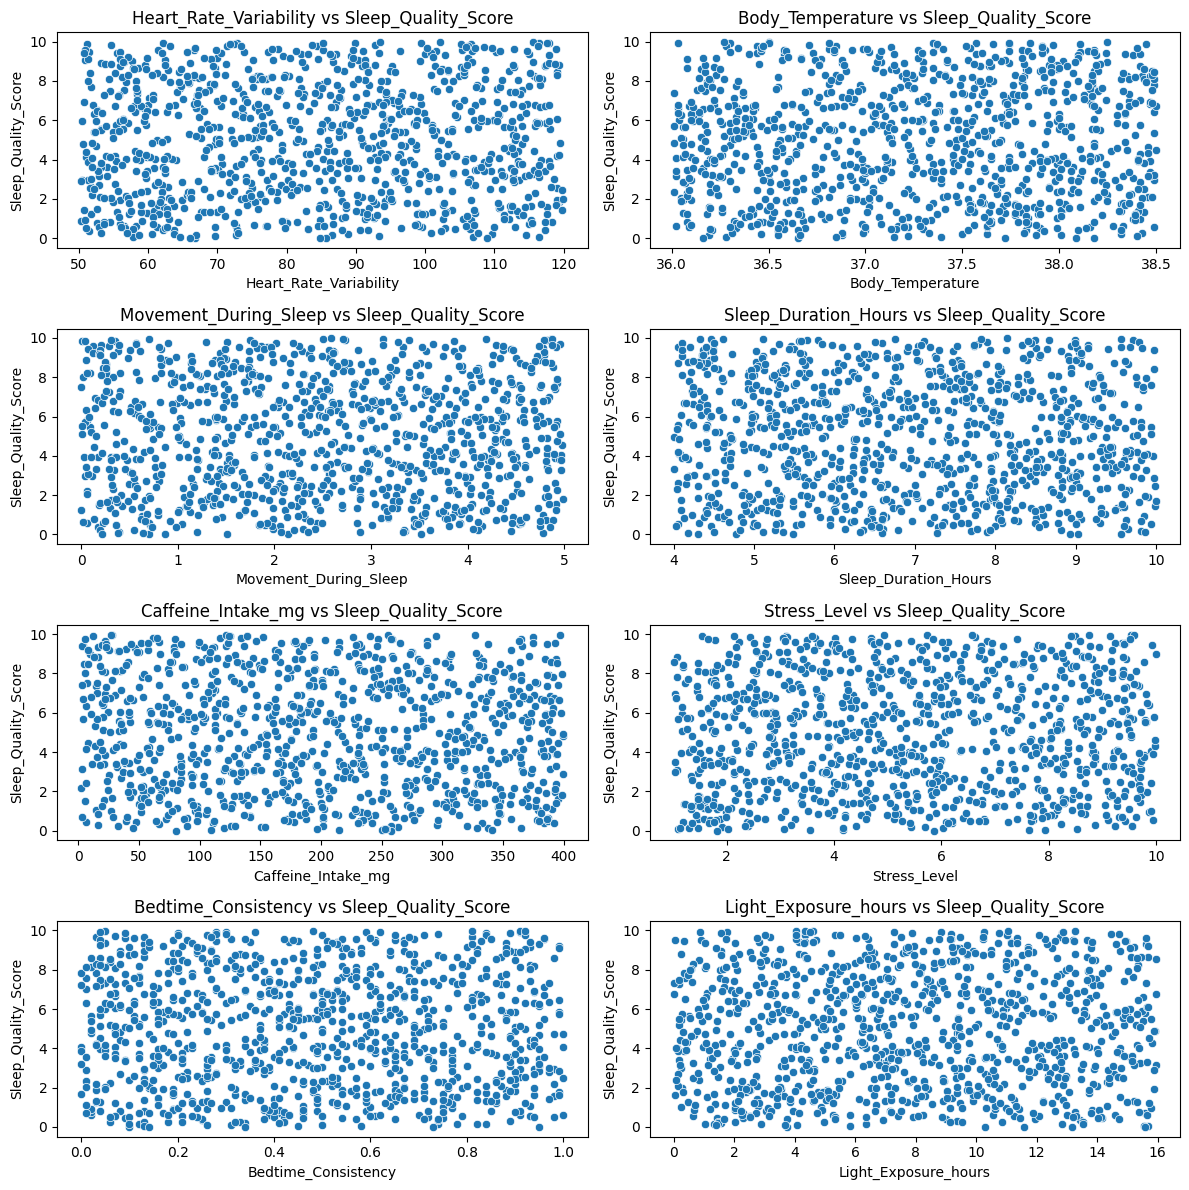

In [5]:
rows, cols_layout = 4, 2
fig, axes = plt.subplots(rows, cols_layout, figsize=(12, 12))
axes = axes.flatten()

cols = [col for col in df.columns.to_list() if col != 'Sleep_Quality_Score']

for i, col in enumerate(cols):
    if i < len(axes):
        sns.scatterplot(x=col, y='Sleep_Quality_Score', data=df, ax=axes[i])
        axes[i].set_title(f'{col} vs Sleep_Quality_Score')

plt.tight_layout()
plt.show()

In [6]:
corr_matrix = df.corr()
corr_matrix

,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
Heart_Rate_Variability,1.000000,0.029186,0.014570,-0.029414,0.034751,-0.059446,0.027250,-0.025111,-0.040856
Body_Temperature,0.029186,1.000000,0.027347,-0.005760,0.032978,0.030023,0.042423,0.049621,0.003121
Movement_During_Sleep,0.014570,0.027347,1.000000,-0.013619,-0.008928,-0.020208,-0.028203,-0.047277,-0.005330
Sleep_Duration_Hours,-0.029414,-0.005760,-0.013619,1.000000,-0.044683,0.039821,-0.017170,-0.023038,0.025400
Sleep_Quality_Score,0.034751,0.032978,-0.008928,-0.044683,1.000000,-0.055882,0.020586,-0.009052,0.028318
Caffeine_Intake_mg,-0.059446,0.030023,-0.020208,0.039821,-0.055882,1.000000,0.007979,0.012094,-0.031930
Stress_Level,0.027250,0.042423,-0.028203,-0.017170,0.020586,0.007979,1.000000,0.038214,0.001184
Bedtime_Consistency,-0.025111,0.049621,-0.047277,-0.023038,-0.009052,0.012094,0.038214,1.000000,-0.049813
Light_Exposure_hours,-0.040856,0.003121,-0.005330,0.025400,0.028318,-0.031930,0.001184,-0.049813,1.000000


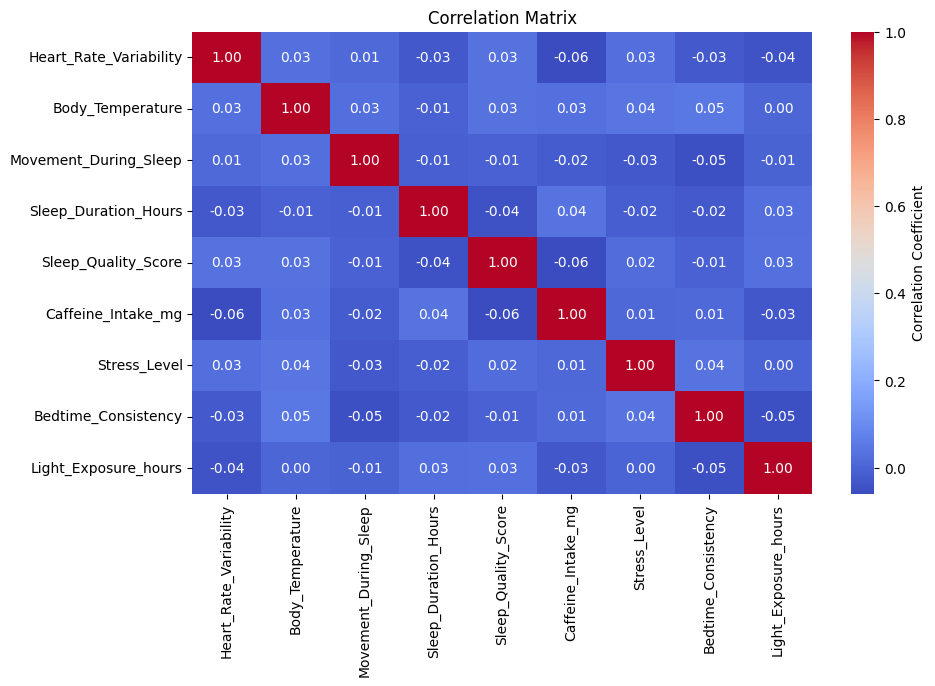

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'}, annot= True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
np.random.seed(42)

X = df.drop(columns=['Sleep_Quality_Score'])
y = df['Sleep_Quality_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.516912363424456
R-squared: -0.029726763973317638
